# Task 4.9 Part 2

## Step 1

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import os
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path to data folder
path = r'/Users/farhodfurkatov/Desktop/CF Data Immersion Achievment 4/Instacart Basket Analysis/02 Data'

In [4]:
# Importing Customer_orders data set
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'customer_ords.pkl'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,first_name,last_name,Gender,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both


## Step 2

In [9]:
# In the first notebook Task 4.9 Follow

## Step 3

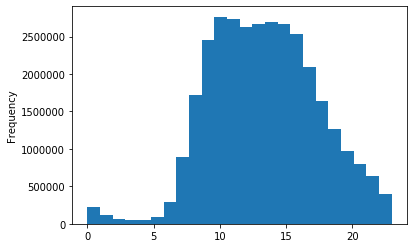

In [10]:
# Creating histogram order_hour_of_day
hist = df['order_hour_of_day'].plot.hist(bins = 24)

In [11]:
# Checking the numbers
df['order_hour_of_day'].value_counts(dropna= False)

10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: order_hour_of_day, dtype: int64

In [14]:
# path to analysis folder
path2 = r'/Users/farhodfurkatov/Desktop/CF Data Immersion Achievment 4/Instacart Basket Analysis/04 Analysis'

In [16]:
# Saving the histogram
hist.figure.savefig(os.path.join(path2, 'Visualization','hist_order_hour_of_day.png'))

In [17]:
# From the histogram we can see busiest hours for placing the orders and their counts

## Step 4

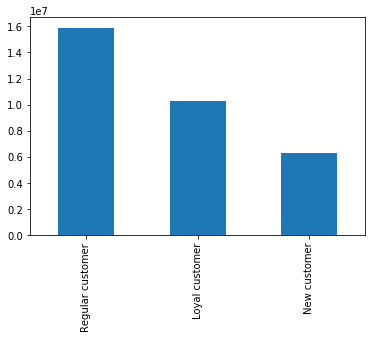

In [35]:
# Creating Bar chart to see loyal customers
loyalty_bar_chart = df['loyalty_flag'].value_counts().plot.bar()

In [19]:
# chack
df['loyalty_flag'].value_counts()

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

In [20]:
# This is visual breakdowns of customers by their loyalty

In [36]:
# Saving the graph
loyalty_bar_chart.figure.savefig(os.path.join(path2, 'Visualization','customer_loyalty.png'))

# Step 5

In [21]:
# Creating sample dataset for our line chart for hourly spending for the day
np.random.seed(7)

In [22]:
dev = np.random.rand(len(df)) <= 0.7

In [23]:
dev

array([ True, False,  True, ..., False,  True,  True])

In [24]:
# Store 70% data in sample df in big
big = df[dev]

In [25]:
# Store 30% data in sample df in small
small = df[~dev]

In [27]:
# check the result
len(df)

32434212

In [28]:
len(big) + len(small)

32434212

In [29]:
df_2 = small[['order_hour_of_day', 'prices']]

In [31]:
df_2.head()

,order_hour_of_day,prices
1,7,9.0
3,7,9.0
4,15,9.0
11,8,4.4
15,15,4.4


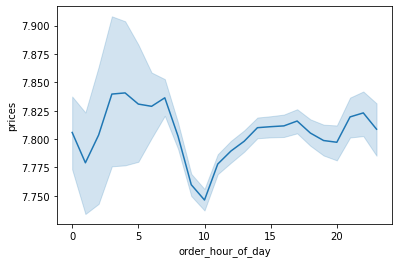

In [32]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [37]:
# This chart shows that spend per customer higher and lower in given time of the day. We know we dont have many shop 
# between 4 and 8 am, but they spend more per transaction

In [45]:
# saving the line chart
line.figure.savefig(os.path.join(path2, 'Visualization','line_hourly_prices.png'))

## Step 7 

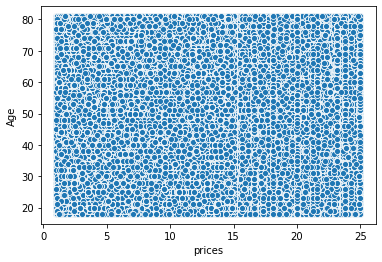

In [38]:
# Creating scatterplot to see connection between Age and Spending power 
sns.scatterplot(x = 'prices', y = 'Age', data = df)


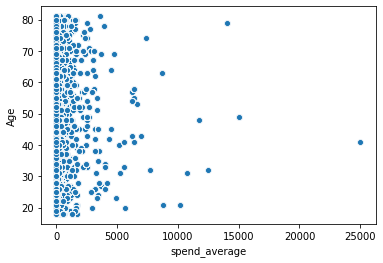

In [43]:
# Trying with sample small dataset and looking at average_spent
scatter_age_spend_ave = sns.scatterplot(x = 'spend_average', y = 'Age', data = small)

In [44]:
# I have tried to check if differnt Age group of people shop for higher priced items or if the spend more on Average, 
# However I did not see clear correlation between them 

In [46]:
scatter_age_spend_ave.figure.savefig(os.path.join(path2, 'Visualization','scatter_age_spend_ave.png'))